In [6]:
#Python Machine Learning Injury Prediction 
#By: Amiel Satvedi
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (20.0,10.0)

data = pd.read_csv('c:\\Users\Ameal_Order\Documents\Mobile Computing\Fall 2019\FPL_2018_19.csv', encoding='cp1252')
data2 = pd.read_csv('c:\\Users\Ameal_Order\Documents\Mobile Computing\Fall 2019\FPL_2017_18.csv', encoding='cp1252')
data3 = pd.read_csv('c:\\Users\Ameal_Order\Documents\Mobile Computing\Fall 2019\FPL_2016_17.csv', encoding='cp1252')
print(data.shape)
data.head()
data.describe()

(253, 11)


,Appearance,Minutes_Played,Distance_per_season,Distance_per_match,Age,Subbed_on,Subbed_off,num_of_injuries
count,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000,253.000000
mean,28.122530,2084.715415,229.992253,7.988933,26.332016,4.841897,5.735178,0.612648
std,7.442158,841.765137,95.103904,2.106231,3.619891,5.208996,5.339006,0.886494
min,4.000000,149.000000,16.090000,2.120000,18.000000,0.000000,0.000000,0.000000
25%,24.000000,1439.000000,160.690000,6.710000,24.000000,1.000000,1.000000,0.000000
50%,29.000000,2099.000000,232.580000,8.480000,26.000000,3.000000,4.000000,0.000000
75%,34.000000,2821.000000,309.550000,9.570000,28.000000,8.000000,9.000000,1.000000
max,38.000000,3420.000000,441.620000,11.940000,38.000000,23.000000,23.000000,5.000000


In [41]:
#mean value
X = data['Minutes_Played'].values
Y= data['Distance_per_season'].values

In [42]:
mean_x = np.mean(X)
mean_y =np.mean(Y)

#number of values
m = len(X)

#using formula to cal b1 and b2
numer = 0
denom = 0
for i in range(m) :
    numer += (X[i] + mean_x) * (Y[i] + mean_y)
    denom += (X[i] + mean_y) ** 2
b1 = numer/denom
b0 = mean_y - (b1 * mean_x)

#print coeff
print(b1,b0)

0.327387379458 -452.517263674


<function matplotlib.pyplot.show>

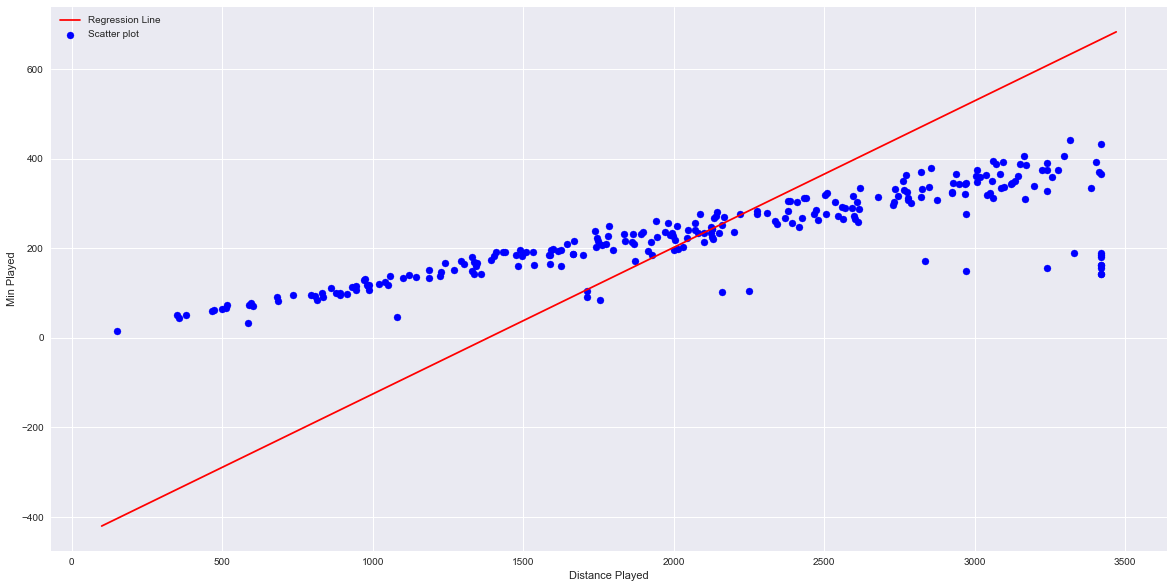

In [43]:
#plots
max_x = np.max(X) + 50
min_x = np.min(X) - 50

#Calculating line values x and y
x = np.linspace(min_x, max_x, 10)
y = b0 + b1 * x

#Plot line
plt.plot(x,y, color ='red', label ='Regression Line')
#scannter plots
plt.scatter(X,Y, color='blue', label= 'Scatter plot')

plt.xlabel("Distance Played")
plt.ylabel("Min Played")
plt.legend()
plt.show

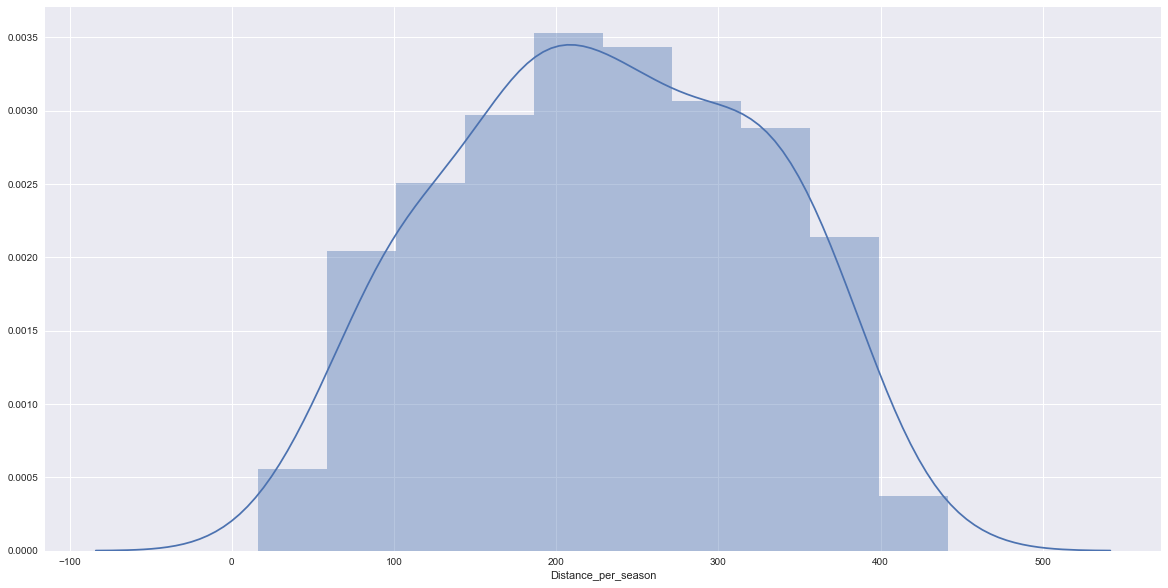

In [94]:
#SNS Distribution Plots
sns.distplot(data['Distance_per_season'])

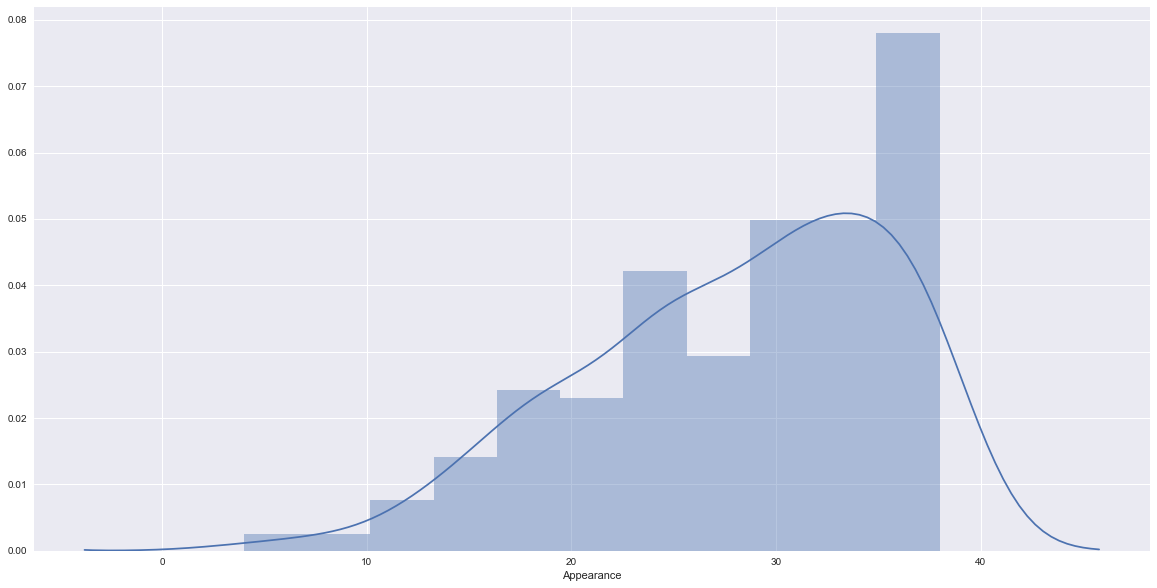

In [3]:
sns.distplot(data['Appearance'])

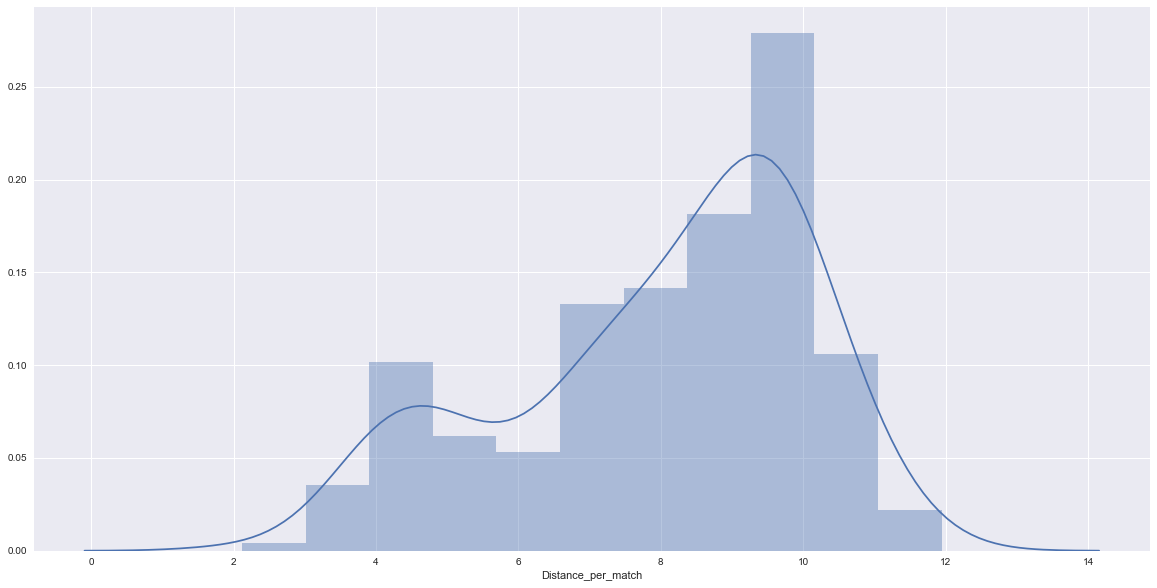

In [36]:
sns.distplot(data['Distance_per_match'])

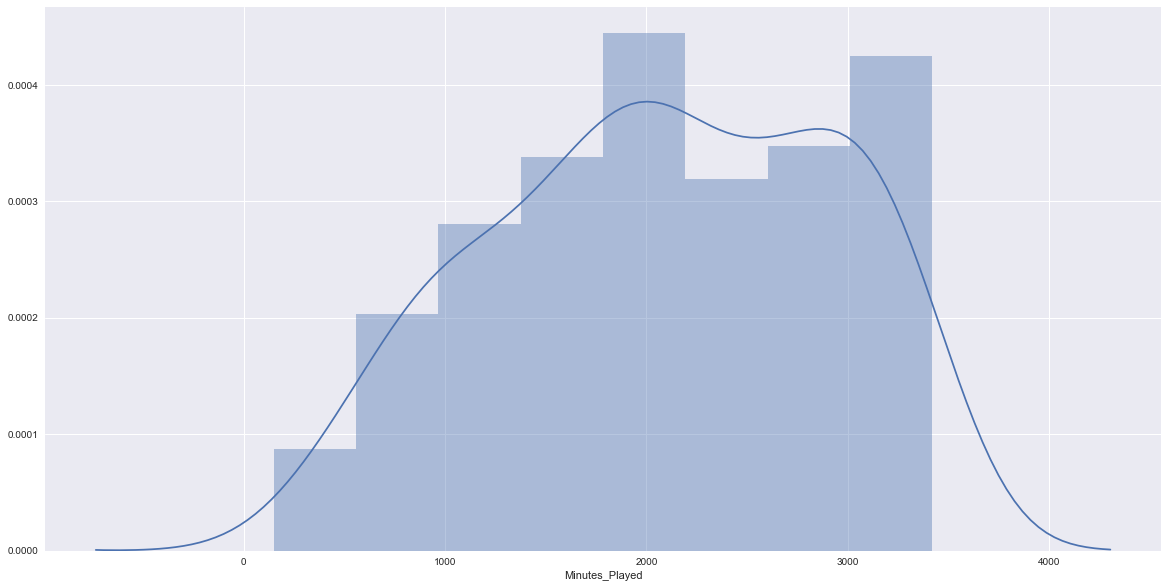

In [4]:
sns.distplot(data['Minutes_Played'])

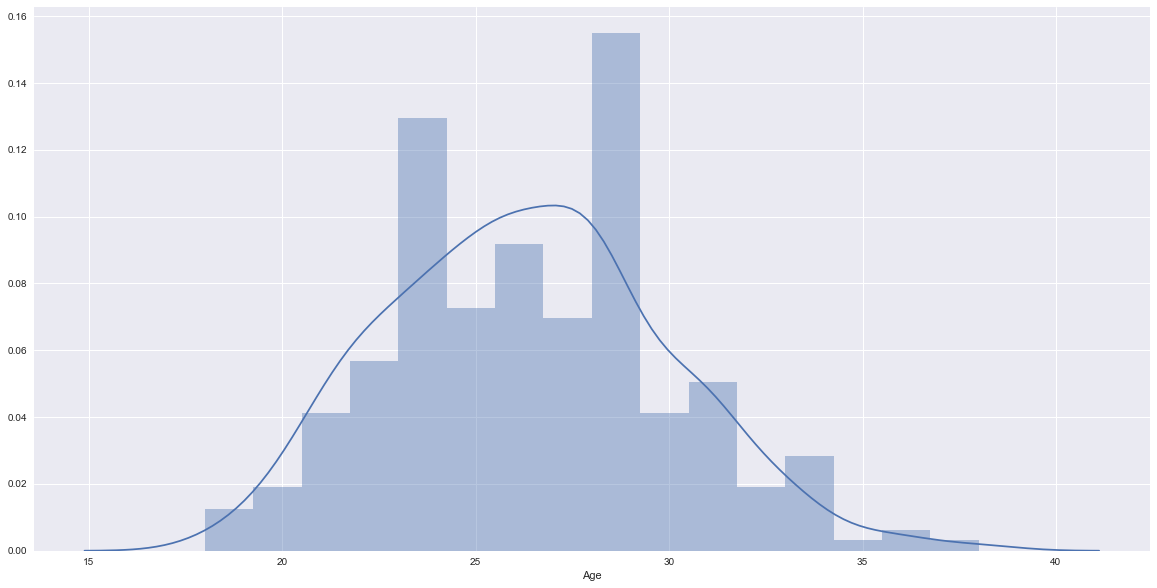

In [5]:
sns.distplot(data['Age'])

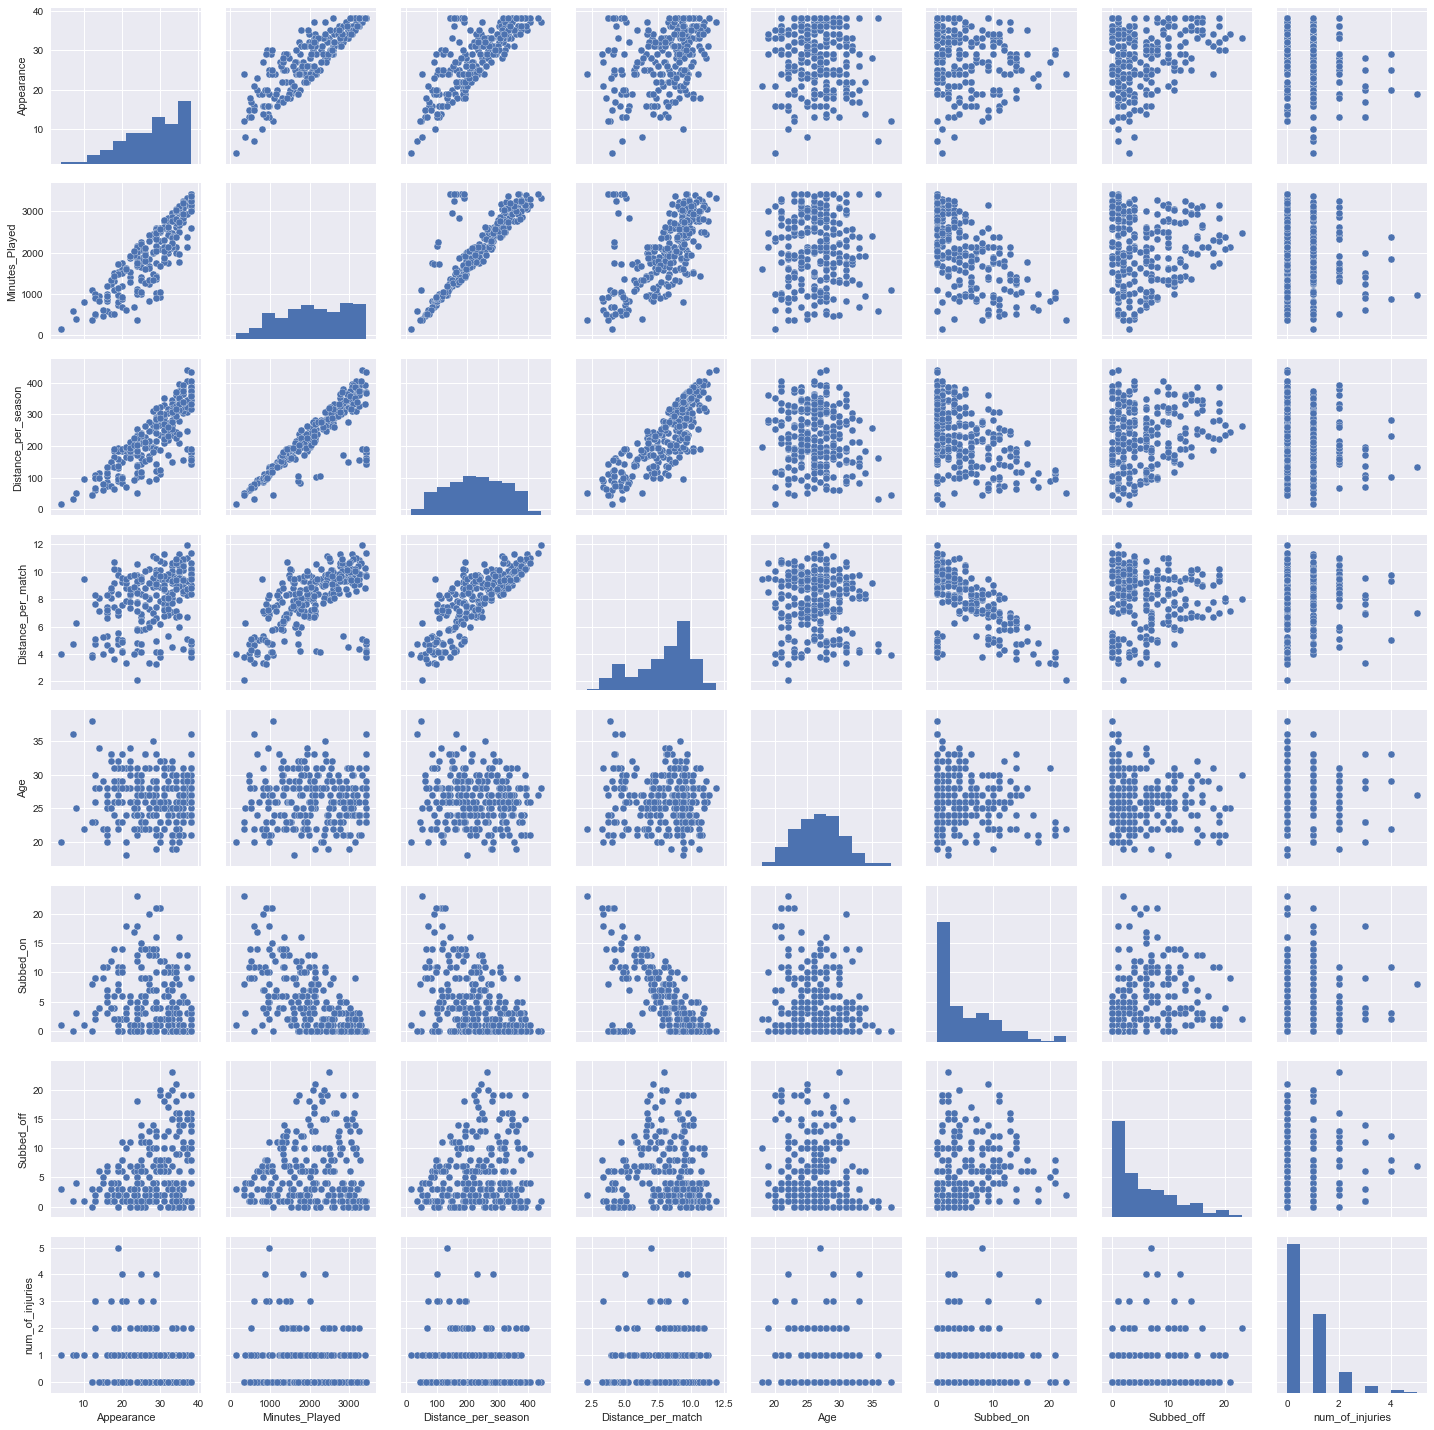

In [95]:
#SNS Pair Plot
sns.pairplot(data) 

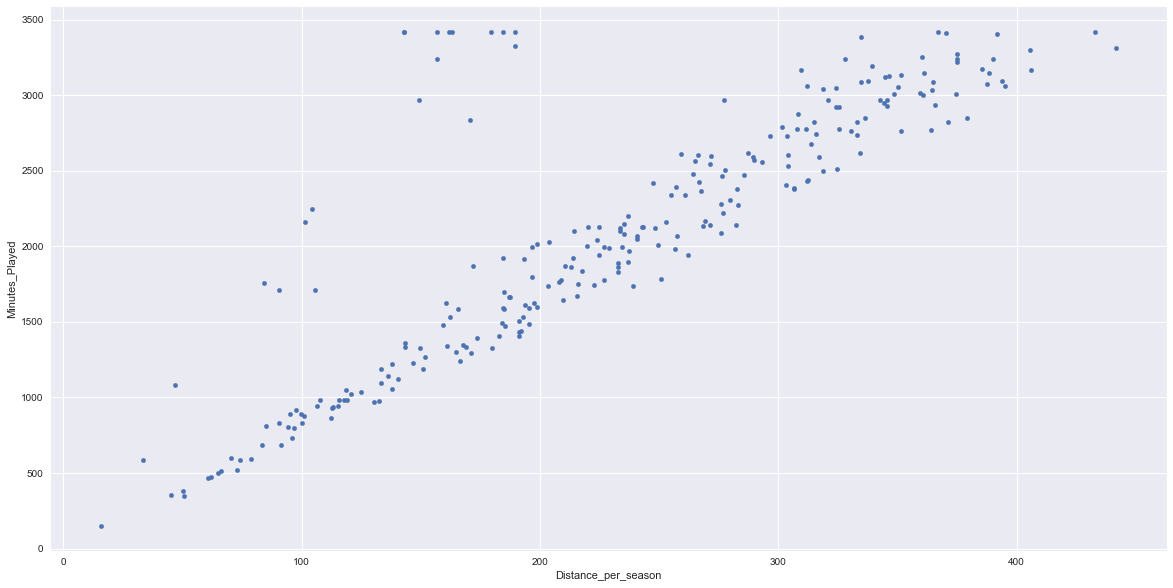

In [40]:
#Relationship of various plot combined together
data.plot(kind='scatter', x='Distance_per_season', y='Minutes_Played')
plt.show()

In [41]:
#Correlation of variables 
minPlayDist = data['Minutes_Played'].corr(data['Distance_per_season'])
minPlayApp = data['Minutes_Played'].corr(data['Appearance'])
minPAge = data['Minutes_Played'].corr(data['Age'])
minPDistM = data['Minutes_Played'].corr(data['Distance_per_match'])
distApp = data['Distance_per_season'].corr(data['Appearance'])
distAge = data['Distance_per_season'].corr(data['Age'])
AgeInj = data['Age'].corr(data['num_of_injuries'])
distance = data['Distance_per_match'].corr(data['Distance_per_season'])

#Print Correlation
print("Correlation of Focus Variables based on minutes Played")
print("Minutes Played vs. Distance per Season:",minPlayDist)
print("Minutes Played vs. Appearances:",minPlayApp)
print("Minutes Played vs. Distance per Match:",minPDistM,"\n")
print("Correlation of Focus Variables based on Distance per season")
print("Distance per Season vs. Appearances:",distApp)
print("Distance Per Match vs. Distance per Season:", distance,"\n")

Correlation of Focus Variables based on minutes Played
Minutes Played vs. Distance per Season: 0.843824038048
Minutes Played vs. Appearances: 0.873341432075
Minutes Played vs. Distance per Match: 0.554454665584 

Correlation of Focus Variables based on Distance per season
Distance per Season vs. Appearances: 0.792911377663
Distance Per Match vs. Distance per Season: 0.823878263674 



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001C585F5CFD0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001C586E370F0>]], dtype=object)

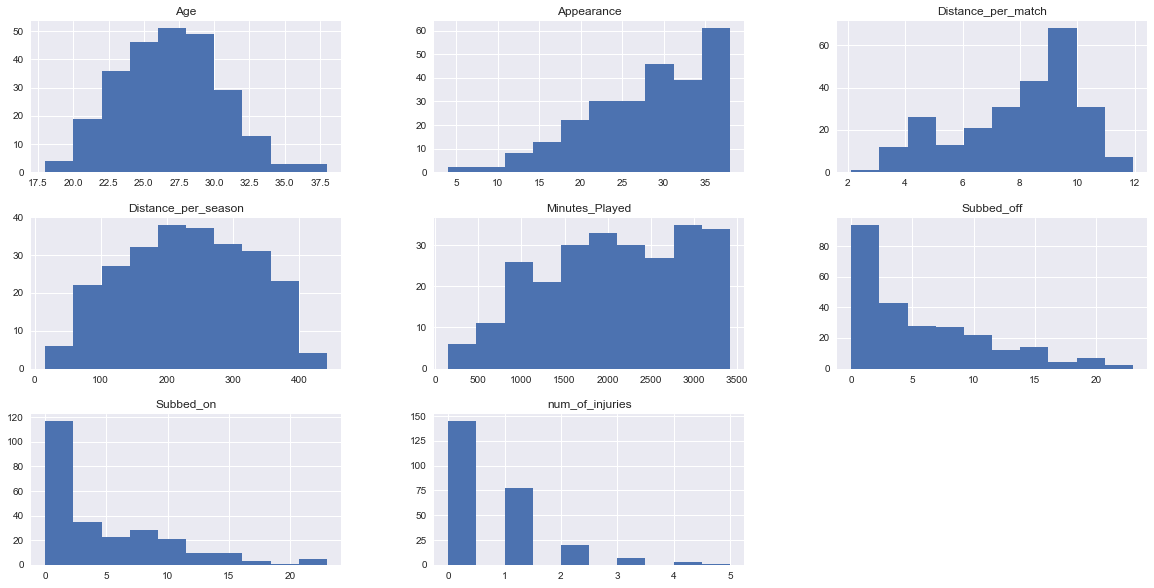

In [43]:
#Histogram of all data 
data.hist() 

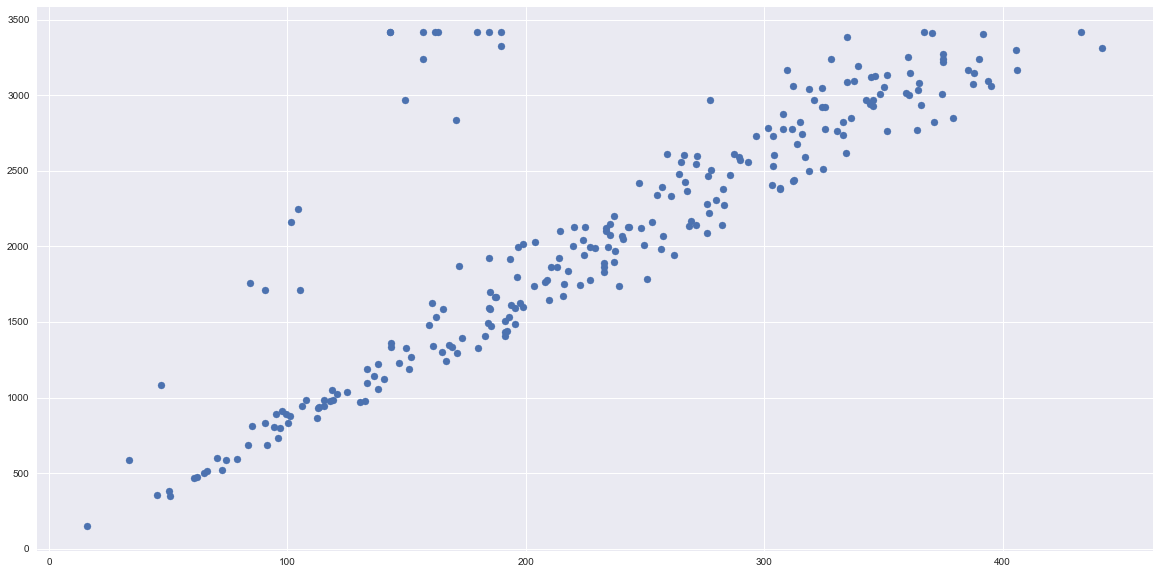

In [44]:
plt.scatter(data['Distance_per_season'],data['Minutes_Played'])

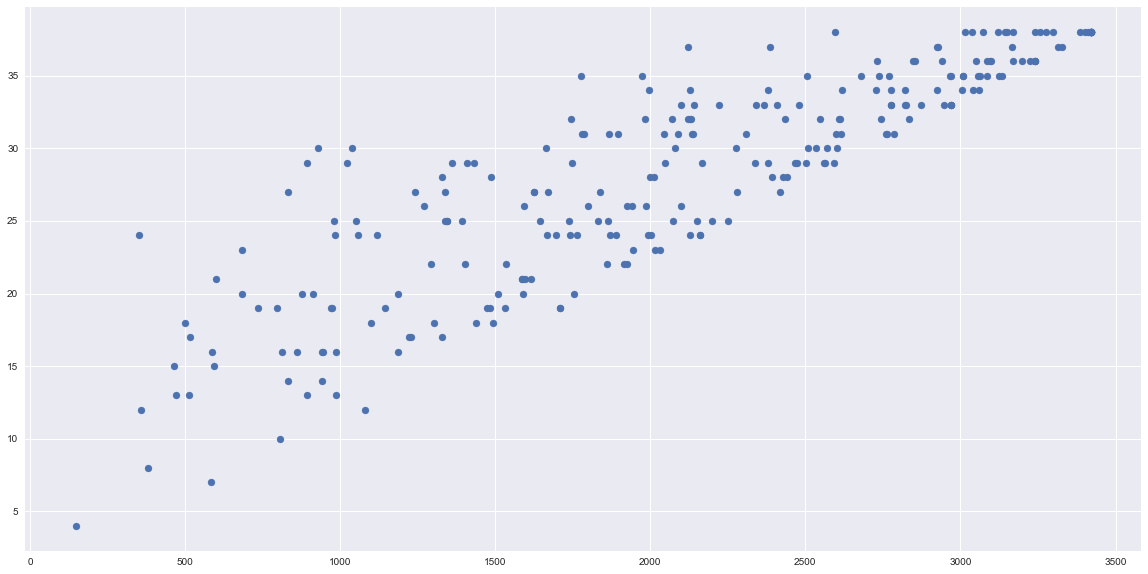

In [48]:
plt.scatter(data['Minutes_Played'],data['Appearance'])

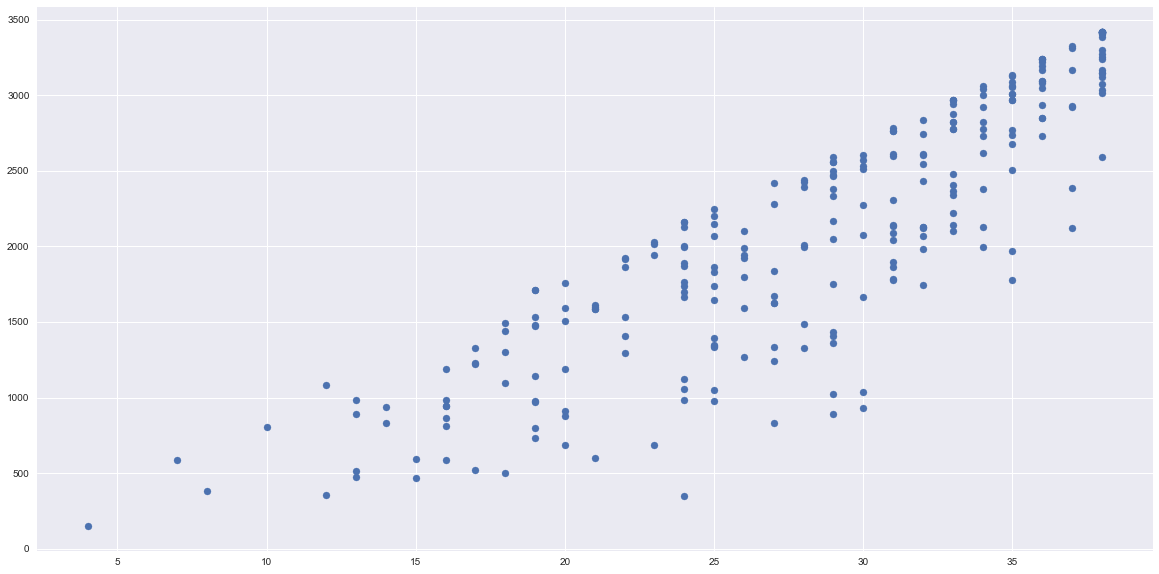

In [52]:
plt.scatter(data['Appearance'],data['Minutes_Played'])

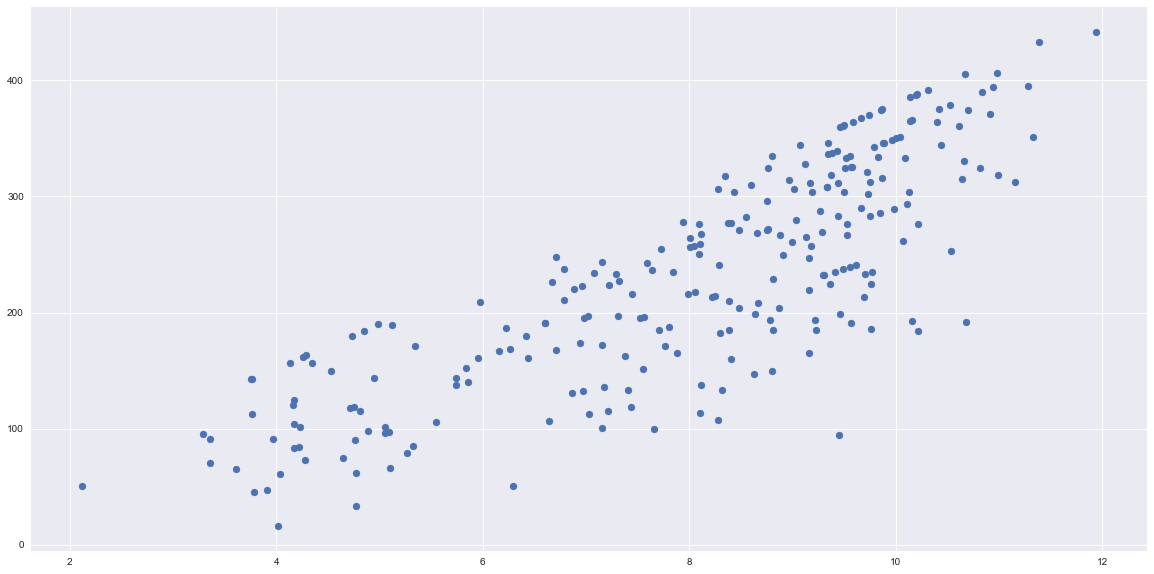

In [49]:
plt.scatter(data['Distance_per_match'],data['Distance_per_season'])

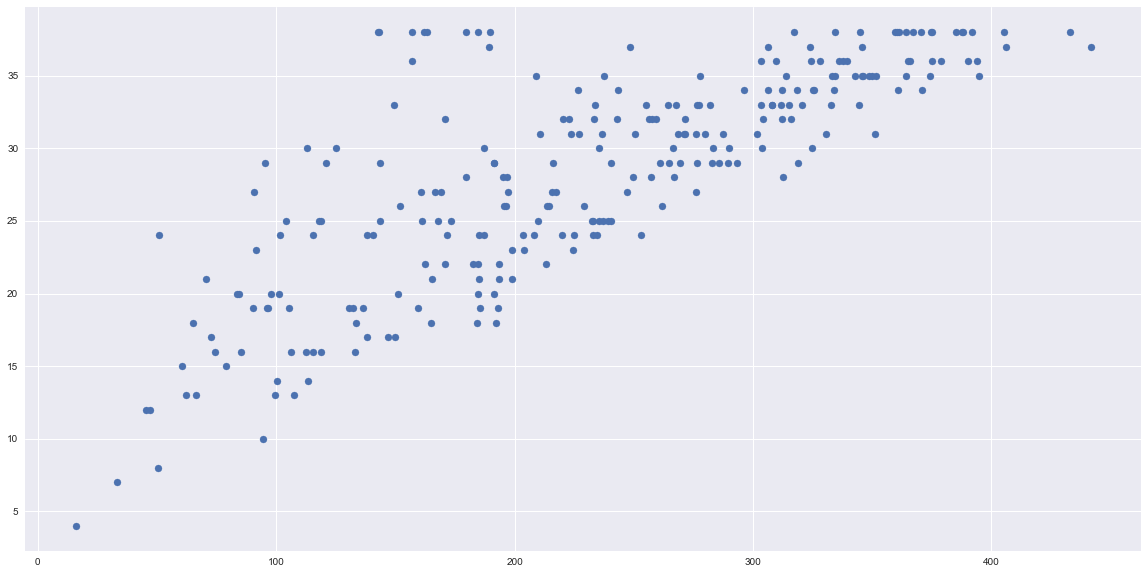

In [50]:
plt.scatter(data['Distance_per_season'],data['Appearance'])

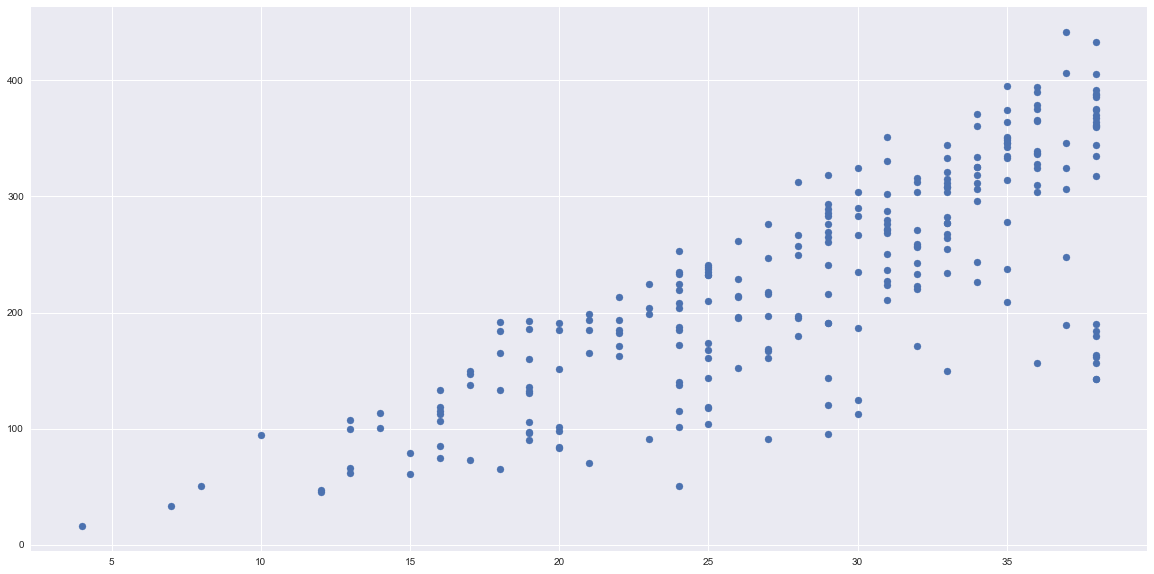

In [53]:
plt.scatter(data['Appearance'],data['Distance_per_season'])

In [96]:
#Scores of varialbes based on thier relationship
X = pd.DataFrame(data['Minutes_Played'])
y = pd.DataFrame(data['Distance_per_season'])

model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
 model.fit(X.iloc[train,:], y.iloc[train,:])
 scores.append(model.score(X.iloc[test,:], y.iloc[test,:]))
print(scores)

[0.68695994879603117, 0.74447906550753296, 0.69353721718354966]


In [84]:
X1 = pd.DataFrame(data['Minutes_Played'])
y1 = pd.DataFrame(data['Appearance'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X1, y1)):
 model.fit(X1.iloc[train,:], y1.iloc[train,:])
 score = model.score(X1.iloc[test,:], y1.iloc[test,:])
 scores.append(score)
print(scores)

[0.74837721870232676, 0.76099200682390133, 0.77840567628033086]


In [85]:
X2 = pd.DataFrame(data['Minutes_Played'])
y2 = pd.DataFrame(data['Distance_per_match'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X2, y2)):
 model.fit(X2.iloc[train,:], y2.iloc[train,:])
 score = model.score(X2.iloc[test,:], y2.iloc[test,:])
 scores.append(score)
print(scores)

[0.26250330059641191, 0.32208003726576151, 0.31483510752760369]


In [86]:
X3 = pd.DataFrame(data['Appearance'])
y3 = pd.DataFrame(data['Distance_per_season'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X3, y3)):
 model.fit(X3.iloc[train,:], y3.iloc[train,:])
 score = model.score(X3.iloc[test,:], y3.iloc[test,:])
 scores.append(score)
print(scores)

[0.62850784360410872, 0.60595052105404146, 0.63550499918085457]


In [66]:
X4 = pd.DataFrame(data['Distance_per_match'])
y4 = pd.DataFrame(data['Distance_per_season'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X4, y4)):
 model.fit(X4.iloc[train,:], y4.iloc[train,:])
 score = model.score(X4.iloc[test,:], y4.iloc[test,:])
 scores.append(score)
print(scores)

[0.66837472927314123, 0.67163637929988229, 0.68789310635558265]


In [70]:
X5 = pd.DataFrame(data['Age'])
y5 = pd.DataFrame(data['num_of_injuries'])
model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X5, y5)):
 model.fit(X5.iloc[train,:], y5.iloc[train,:])
 score = model.score(X5.iloc[test,:], y5.iloc[test,:])
 scores.append(score)
print(scores)

[-0.087803783034260383, -0.020008512674565937, -0.047050350813805819]


In [3]:
#Arrays where one set of data is set as target variables while other is set for training 
A = data[['Appearance', 'Minutes_Played', 'Distance_per_match',
               'Age', 'num_of_injuries']]
b = data['Distance_per_season']

In [4]:
#Using 50% of data 
from sklearn.model_selection import train_test_split
A_train, A_test, b_train, b_test = train_test_split(A, b, test_size=0.5, random_state=101)

In [5]:
lm = LinearRegression()
lm.fit(A_train,b_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [6]:
predictions = lm.predict(A_test)

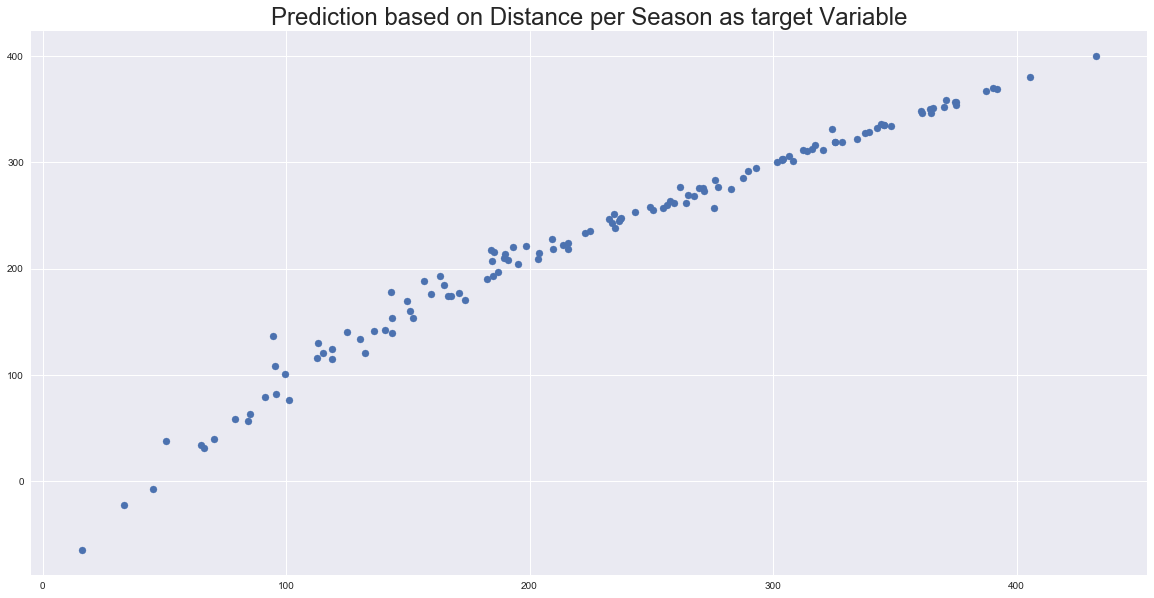

In [7]:
plt.scatter(b_test,predictions)
plt.title('Prediction based on Distance per Season as target Variable', size=24)

In [9]:
#To retrieve the intercept:
print(lm.intercept_)
#For retrieving the slope:
print(lm.coef_)

-209.070254082
[  7.81471040e+00  -5.83009888e-03   2.91932304e+01  -6.54234126e-03
  -3.23070491e+00]


In [10]:
#Finding the Mean error and Root mean squared
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(b_test, predictions))  
print('Mean Squared Error:', metrics.mean_squared_error(b_test, predictions))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(b_test, predictions)))

Mean Absolute Error: 13.2477169805
Mean Squared Error: 321.860155502
Root Mean Squared Error: 17.9404614072


In [8]:
df = pd.DataFrame({'Actual': b_test, 'Predicted': predictions})
df1 = df.head(25)

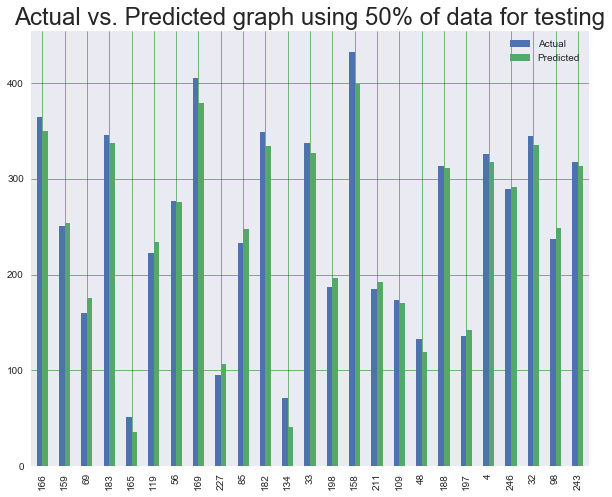

In [9]:
#Plots to compare differences
df1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual vs. Predicted graph using 50% of data for testing', size=24)
plt.show()

In [45]:
data.corr()

,Appearance,Minutes_Played,Distance_per_season,Distance_per_match,Age,Subbed_on,Subbed_off,num_of_injuries
Appearance,1.000000,0.873341,0.792911,0.349204,-0.099766,-0.178123,0.250198,-0.266453
Minutes_Played,0.873341,1.000000,0.843824,0.554455,0.007289,-0.621268,0.001069,-0.217189
Distance_per_season,0.792911,0.843824,1.000000,0.823878,-0.113133,-0.459467,0.189835,-0.154829
Distance_per_match,0.349204,0.554455,0.823878,1.000000,-0.077832,-0.587154,0.059104,0.025047
Age,-0.099766,0.007289,-0.113133,-0.077832,1.000000,-0.154412,-0.136491,0.004375
Subbed_on,-0.178123,-0.621268,-0.459467,-0.587154,-0.154412,1.000000,0.252472,-0.005581
Subbed_off,0.250198,0.001069,0.189835,0.059104,-0.136491,0.252472,1.000000,0.074659
num_of_injuries,-0.266453,-0.217189,-0.154829,0.025047,0.004375,-0.005581,0.074659,1.000000


In [31]:
P = data[['Appearance', 'Minutes_Played', 'Distance_per_match',
               'Age']]
q = data['Distance_per_season']

In [32]:
from sklearn.model_selection import train_test_split
P_train, P_test, q_train, q_test = train_test_split(P, q, test_size=0.6, random_state=101)

In [33]:
lRegressor = LinearRegression()
lRegressor.fit(P_train,q_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [34]:
predictDist = lRegressor.predict(P_test)

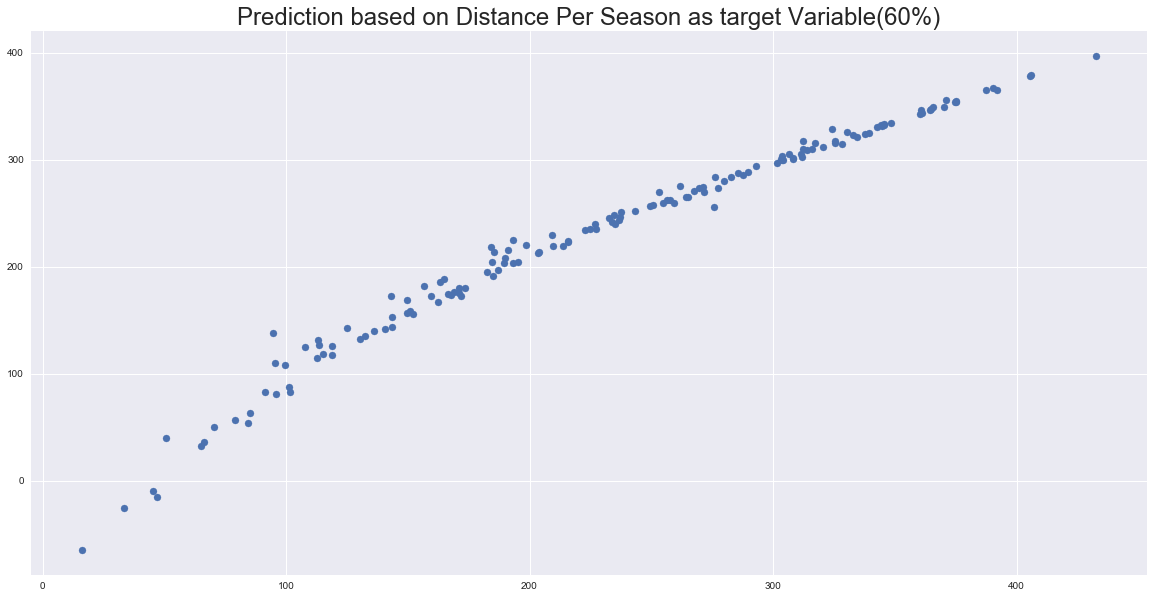

In [35]:
plt.title("Prediction based on Distance Per Season as target Variable(60%)", size=24)
plt.scatter(q_test,predictDist)

In [36]:
#To retrieve the intercept:
print(lRegressor.intercept_)
#For retrieving the slope:
print(lRegressor.coef_)

-211.846994307
[  8.15858630e+00  -9.76883572e-03   2.95902480e+01  -1.68603462e-01]


In [38]:
dafifty = pd.DataFrame({'Actual': q_test, 'Predicted': predictDist})
dafifty1 = dafifty.head(25)

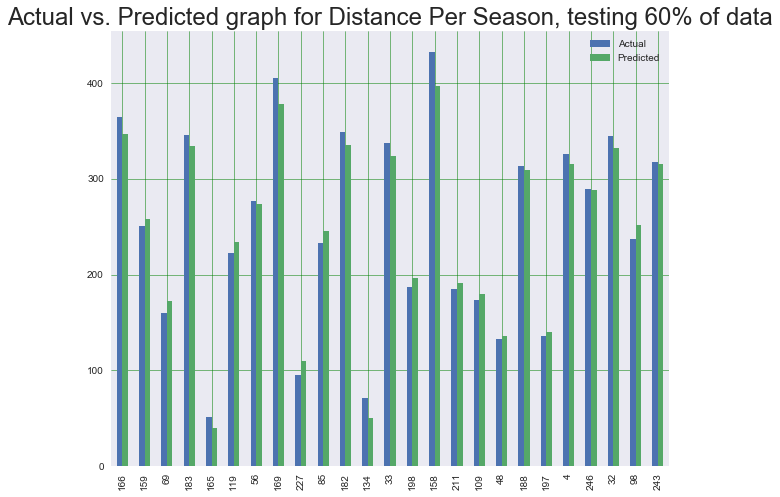

In [39]:
dafifty1.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title("Actual vs. Predicted graph for Distance Per Season, testing 60% of data", size=24)
plt.show()

In [41]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(q_test, predictDist))  
print('Mean Squared Error:', metrics.mean_squared_error(q_test, predictDist))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(q_test, predictDist)))

Mean Absolute Error: 13.1347244752
Mean Squared Error: 319.8497241
Root Mean Squared Error: 17.8843429877


In [51]:
#Using Appearance as targer variable
I = data[['Distance_per_season', 'Subbed_on', 'Subbed_off',
               'Age', 'num_of_injuries']]
j = data['Appearance']

In [52]:
I_train, I_test, j_train, j_test = train_test_split(I, j, test_size=0.3, random_state=0)

In [53]:
regTest2 = LinearRegression()
regTest2.fit(I_train,j_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [54]:
predictApps2 = regTest2.predict(I_test)

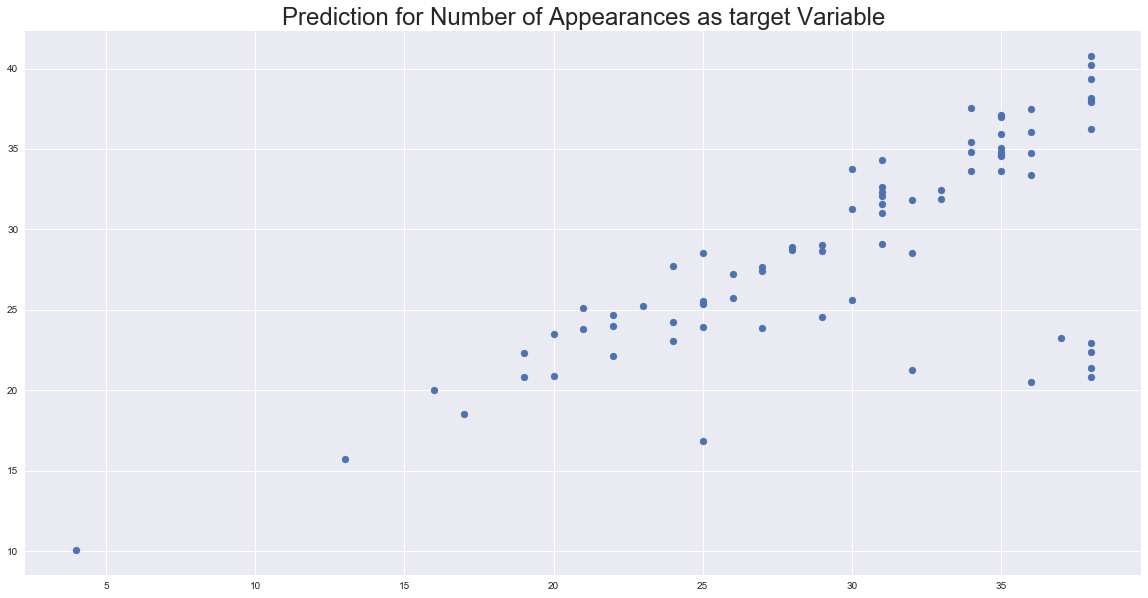

In [55]:
plt.scatter(j_test,predictApps2)
plt.title('Prediction for Number of Appearances as target Variable',size=24)

In [56]:
df1 = pd.DataFrame({'Actual': j_test, 'Predicted': predictApps2})
df2 = df1.head(25)

In [57]:
#To retrieve the intercept:
print(regTest2.intercept_)
#For retrieving the slope:
print(regTest2.coef_)

8.24702647705
[ 0.07290961  0.36899694  0.10090647  0.03626045 -0.73796497]


In [58]:
#Score of the Rsquared
regofScatter10 = regTest2.score(I_train,j_train)
print(regofScatter10)

0.754783191412


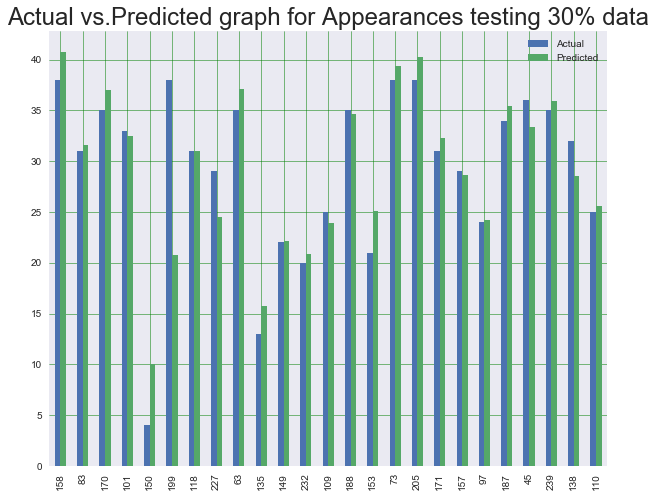

In [59]:
df2.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual vs.Predicted graph for Appearances testing 30% data',size=24)
plt.show()

In [60]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(j_test, predictApps2))  
print('Mean Squared Error:', metrics.mean_squared_error(j_test, predictApps2))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(j_test, predictApps2)))

Mean Absolute Error: 2.96290927192
Mean Squared Error: 25.9487721317
Root Mean Squared Error: 5.09399373102


In [97]:
#Using Age as target variable
K = data[['Distance_per_season', 'Minutes_Played', 'Distance_per_match',
               'Appearance', 'num_of_injuries']]
l = data['Age']

In [105]:
K_train, K_test, l_train, l_test = train_test_split(K, l, test_size=0.4, random_state=0)

In [106]:
regAge1 = LinearRegression()
regAge1.fit(K_train,l_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [107]:
predictAge1 = regTest1.predict(K_test)

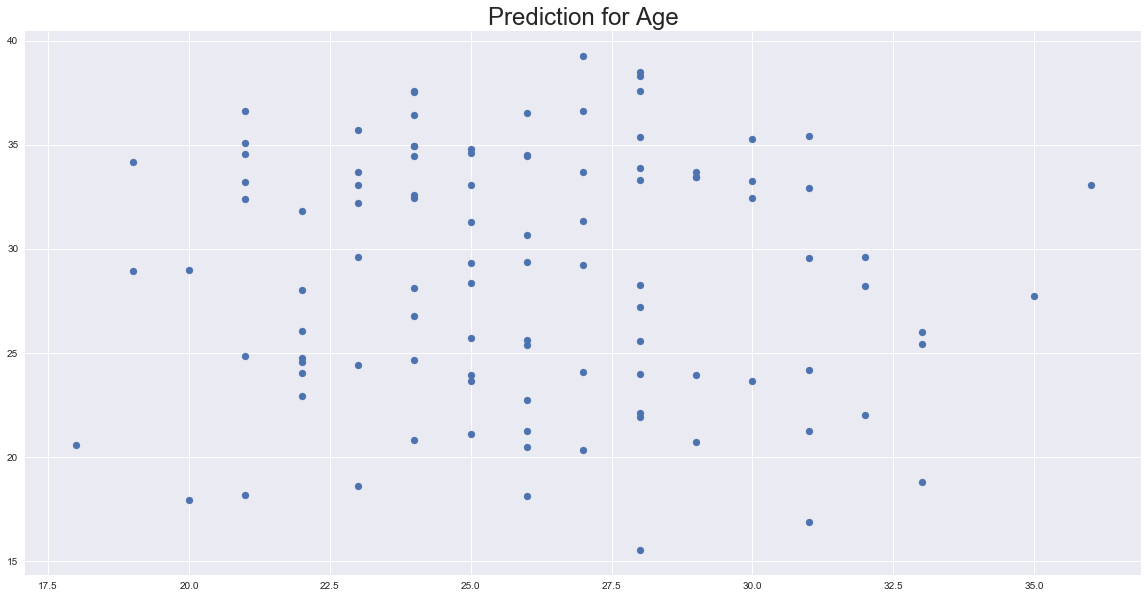

In [111]:
plt.scatter(l_test,predictAge1)
plt.title('Prediction for Age', Size=24)

In [109]:
df3 = pd.DataFrame({'Actual': l_test, 'Predicted': predictAge1})
df4 = df3.head(25)

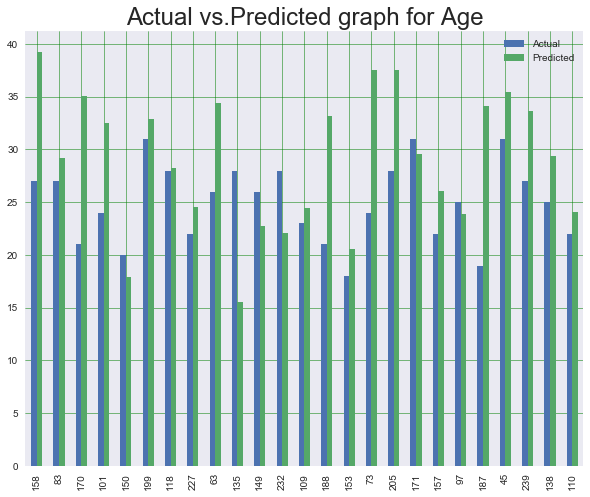

In [110]:
df4.plot(kind='bar',figsize=(10,8))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.title('Actual vs.Predicted graph for Age',size=24)
plt.show()

In [59]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(l_test, predictAge))  
print('Mean Squared Error:', metrics.mean_squared_error(l_test, predictAge))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(l_test, predictAge)))

Mean Absolute Error: 6.52061595724
Mean Squared Error: 58.6919495164
Root Mean Squared Error: 7.66106712647


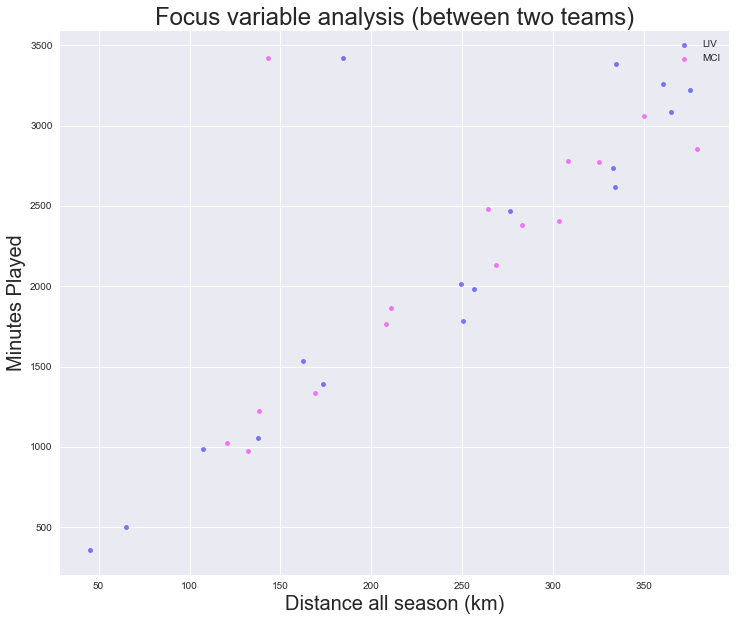

In [6]:
#Relationship of two teams 
ax1= data[data['Team']=='LIV'].plot(kind='scatter', x='Distance_per_season',y='Minutes_Played', color='blue',alpha=0.5, figsize=(12,10))
data[data['Team']=='MCI'].plot(kind='scatter', x='Distance_per_season',y='Minutes_Played', color='magenta',alpha=0.5, figsize=(12,10),ax=ax1)
plt.legend(labels=['LIV','MCI'])
plt.title('Focus variable analysis (between two teams)', size=24)
plt.xlabel('Distance all season (km)', size=20)
plt.ylabel('Minutes Played', size=20);

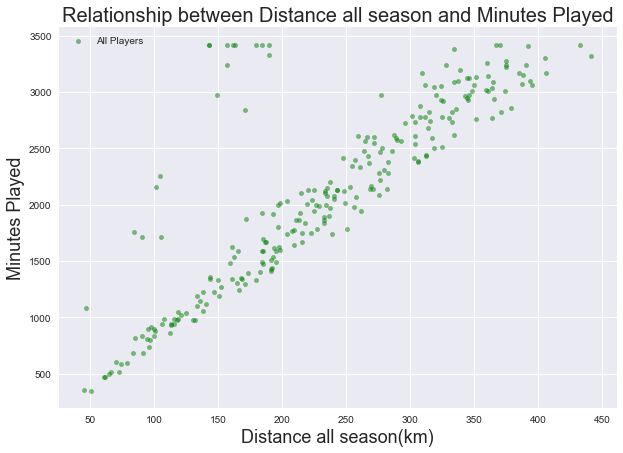

In [7]:
#All data plotted 
sample1 = data[data['Appearance']>=10]
sample1.plot(kind='scatter', x='Distance_per_season',y='Minutes_Played', color='green',alpha=0.5, figsize=(10,7))
plt.legend(labels=['All Players'])
plt.title('Relationship between Distance all season and Minutes Played', size=20)
plt.xlabel('Distance all season(km)', size=18)
plt.ylabel('Minutes Played', size=18);

In [2]:
#Best Fit Polynomials
df_Apperance = data[data['Appearance']>=10]

# Polynomial appearance.
apps_fit = np.polyfit(df_Apperance.Distance_per_season,df_Apperance.Minutes_Played,1)
# array([    7.40132507  385.56050816])
print(apps_fit)

[   7.40132507  385.56050816]


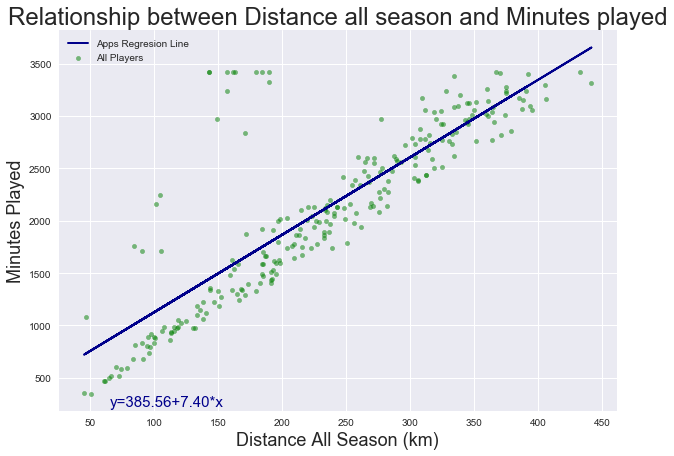

In [9]:
# Appearance dataframes.
df_Apperance = data[data['Appearance']>=10]

# Scatter plots.
sample1.plot(kind='scatter', x='Distance_per_season',y='Minutes_Played', color='green',alpha=0.5, figsize=(10,7))

# Regression lines.
plt.plot(df_Apperance.Distance_per_season,apps_fit[0]*df_Apperance.Distance_per_season+apps_fit[1], color='darkblue', linewidth=2)

# Regression equations.
plt.text(65,230,'y={:.2f}+{:.2f}*x'.format(apps_fit[1],apps_fit[0]),color='darkblue',size=15)

# Legend, title and labels.
plt.legend(labels=['Apps Regresion Line', 'All Players'])
plt.title('Relationship between Distance all season and Minutes played', size=24)
plt.xlabel('Distance All Season (km)', size=18)
plt.ylabel('Minutes Played', size=18);

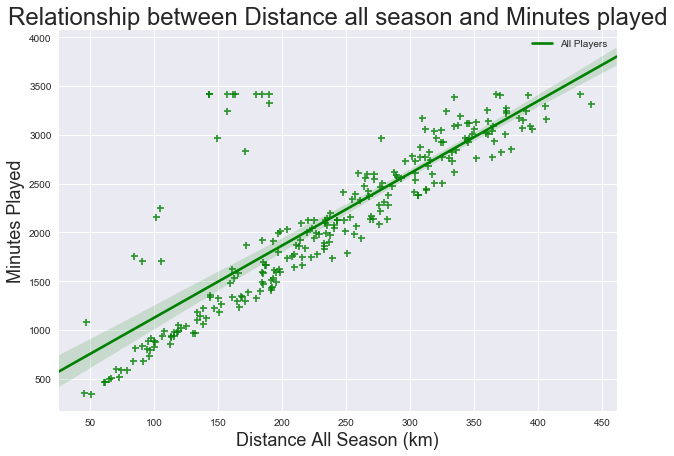

In [10]:
#Overplotting Positive Linear Regression 
fig1 = plt.figure(figsize=(10,7))
sns.regplot(x=df_Apperance.Distance_per_season,y=df_Apperance.Minutes_Played,color='green', marker='+')

# Legend, title and labels.
plt.legend(labels=['All Players'])
plt.title('Relationship between Distance all season and Minutes played', size=24)
plt.xlabel('Distance All Season (km)', size=18)
plt.ylabel('Minutes Played', size=18);

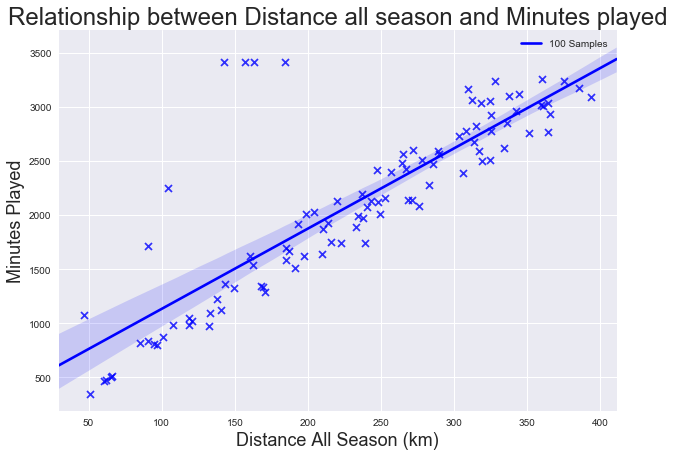

In [26]:
df_Apps_sample1= data[data['Appearance']>=10].sample(100)

# Regression plot using seaborn.
fig2 = plt.figure(figsize=(10,7))
sns.regplot(x=df_Apps_sample1.Distance_per_season,y=df_Apps_sample1.Minutes_Played,color='blue', marker='x')

# Legend, title and labels.
plt.legend(labels=['100 Samples'])
plt.title('Relationship between Distance all season and Minutes played', size=24)
plt.xlabel('Distance All Season (km)', size=18)
plt.ylabel('Minutes Played', size=18);

In [22]:
df_Apperance = data[data['Appearance']>=10]
# Create linear regression object.
regress_Apps= LinearRegression()

# Fit linear regression.
regress_Apps.fit(df_Apperance[['Distance_per_season']], df_Apperance['Minutes_Played'])

#Output of Slope and intercept of line best fit.
print(regress_Apps.intercept_)
#385.560508156

print(regress_Apps.coef_)
#7.40132507


385.560508156
[ 7.40132507]


In [30]:
df_Apperance = data[data['Appearance']>=10]

# Fit the model using numpy.
apps_fit = np.polyfit(df_Apperance.Distance_per_season,df_Apperance.Minutes_Played,1)

# Predictions using numpy.
print(np.polyval(apps_fit,[60]))
# [829.64001235]

# Fit the model using scikit learn.
linregression_apps= LinearRegression()
linregression_apps.fit(df_Apperance[['Distance_per_season']], df_Apperance['Minutes_Played'])

# Predictions using scikit learn.
print(linregression_apps.predict([[60]]))
# [829.64001235]

[ 829.64001235]
[ 829.64001235]


In [27]:
df_Apperance = data[data['Appearance']>=10]

# Pearson correlation coefficient and p-value
pearson_coef, p_value = stats.pearsonr(df_Apperance.Distance_per_season,df_Apperance.Minutes_Played)

print("Appearance correlation coefficient:",pearson_coef)
#0.835623336998

Appearance correlation coefficient: 0.835623336998


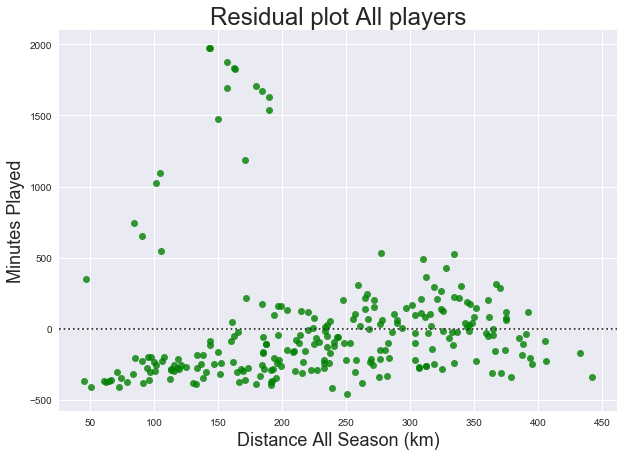

In [33]:
df_Apperance = data[data['Appearance']>=10]
# Residual plot 500 males.
fig = plt.figure(figsize=(10,7))
sns.residplot(df_Apperance.Distance_per_season,df_Apperance.Minutes_Played, color='green')

# Title and labels.
plt.title('Residual plot All players', size=24)
plt.xlabel('Distance All Season (km)', size=18)
plt.ylabel('Minutes Played', size=18);

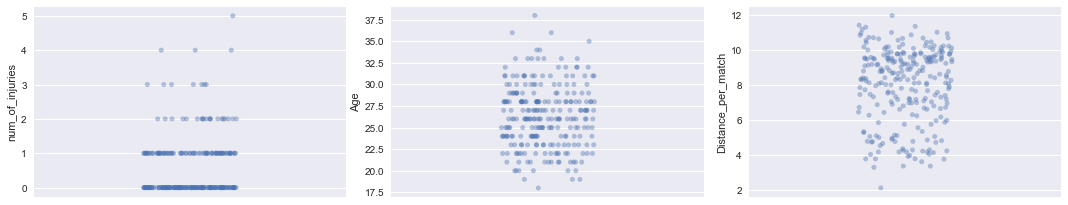

In [3]:
#Small sample of filtered data
sample_df = data[['num_of_injuries', 'Age','Distance_per_match']]
plt.figure(figsize=(15, 3))

#plot a set of  stripplots given a dataframe using the function below
def stripplot_sample(df):
    for idx, name in enumerate(df.columns):
        n = idx + 1
        plt.subplot(1,3,n)
        sns.stripplot(x=name, data=data, jitter=0.15, orient= 'v', alpha=.4)
    plt.tight_layout()
    plt.show()

stripplot_sample(sample_df)

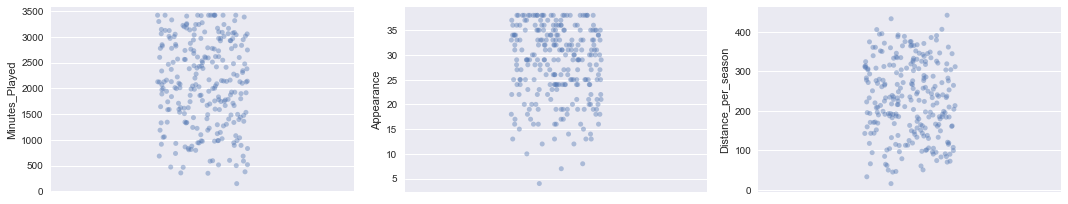

In [4]:
sample_df2 = data[['Minutes_Played', 'Appearance','Distance_per_season']]
plt.figure(figsize=(15, 3))

#plot a set of  stripplots given a dataframe using the function below
def stripplot_sample(df):
    for idx, name in enumerate(df.columns):
        n = idx + 1
        plt.subplot(1,3,n)
        sns.stripplot(x=name, data=data, jitter=0.15, orient= 'v', alpha=.4)
    plt.tight_layout()
    plt.show()

stripplot_sample(sample_df2)

In [89]:
#column names to create filtered data frame
col_names = ['Appearance', 'Age','Subbed_on','Subbed_off', 'Distance_per_match']

#creating new filtered dataset 
new_df =  data[col_names]

#print the shape of the filtered data,
print('The current number of rows and columns is:\n')
print(new_df.shape)
print('\nWe have reduce the number of variables to', new_df.shape[1],'\n')

#Summary statistics and information of filtered data
print(new_df.info())

The current number of rows and columns is:

(253, 5)

We have reduce the number of variables to 5 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 5 columns):
Appearance            253 non-null int64
Age                   253 non-null int64
Subbed_on             253 non-null int64
Subbed_off            253 non-null int64
Distance_per_match    253 non-null float64
dtypes: float64(1), int64(4)
memory usage: 10.0 KB
None


ValueError: Arrays were different lengths: 5 vs 0

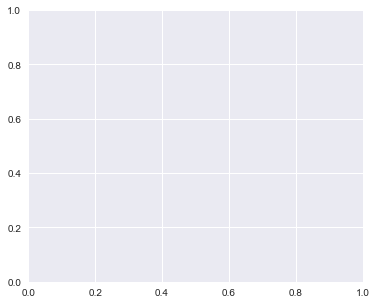

In [90]:
features = new_df.loc[:,new_df.columns != 'Distance_per_season']
targets = new_df.loc[:,new_df.columns == 'Distance_per_season']

#creating correlation of columns using Pearson's
corr = features.corr(method='pearson') 

#plotting the correlation coefficients heatmap matrix
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr, annot=True, xticklabels=corr.columns, 
            yticklabels=corr.columns, ax=ax, linewidths=.5, 
            vmin = -1, vmax=1, center=0)

plt.title('Correlation HeatMap')
plt.show()

In [91]:
#importing our function for splitting the data and an additional cross validation function,
from sklearn.model_selection import train_test_split, cross_val_score

#splitting our dataset randomly with the test data containing 10% of the data,
X_train, X_test, y_train, y_test = train_test_split(features,targets, 
                                                    test_size=0.1, 
                                                    random_state=42)

#view number of training and testing data
print('Training prediction variable includes :',len(y_train) ,'rows')
print('Training the independent variable includes :',len(X_train) ,'rows')
print('Testing prediction variable includes :',len(y_test) ,'rows')
print('Testing independent variable includes :',len(X_test) ,'rows')

Training prediction variable includes : 227 rows
Training the independent variable includes : 227 rows
Testing prediction variable includes : 26 rows
Testing independent variable includes : 26 rows


In [92]:
import sklearn.metrics
from sklearn.linear_model import LinearRegression

#Regression model added using Linear Regression class 
reg_model16 = LinearRegression()

In [93]:
#Fit the trianing data to the model,
reg_model16.fit(X_train, y_train)

#Value of Incercept and the coefficients
print('Intercept :', reg_model16.intercept_[0], '\n')
print(pd.DataFrame({'focus Variables':X_train.columns,'coeficients':reg_model16.coef_[0]}))

ValueError: Found array with 0 feature(s) (shape=(227, 0)) while a minimum of 1 is required.

In [83]:
#Score of the training and testing
print("Training score: {:.2f}".format(reg_model16.score(X_train, y_train)))

NotFittedError: This LinearRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this method.

In [68]:
from sklearn.model_selection import cross_val_score
import math

cv_reg_model12 = LinearRegression()
cv_score = cross_val_score(cv_reg_model12, features, targets,cv=10, scoring='r2')

#outputs of crossing validation and average scores
print('Cross Validation score: {}'.format(cv_score))
print("\nAverage 10-Fold Score: {}".format(np.mean(cv_score)))

Cross Validation score: [ 0.97206127  0.94736234  0.95031712  0.97353216  0.97092406  0.94894507
  0.96894311  0.97261685  0.97257972  0.97935572]

Average 10-Fold Score: 0.9656637418597249


Prediction of Samples are:
 [ 277.29754019  211.75119113   59.97375526  118.77082539  169.16816071]


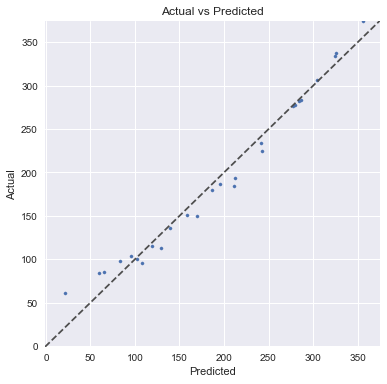

In [70]:
#prediction values using test set
y_pred = reg_model12.predict(X_test)

#print sample of predictions
print('Prediction of Samples are:\n', y_pred[:5].flatten())

y_ypred_a = pd.DataFrame(y_pred)
y_test_a = y_test.reset_index(drop=True, inplace=False)
pred_data = pd.concat([y_test_a,y_ypred_a], axis=1).sort_values(1,axis=1).reset_index(drop=True)

#output samples of predicted values
plt.figure(figsize=(6, 6))
maxlimit = pred_data['Distance_per_season'].max()
plt.xlim(-1, maxlimit)
plt.ylim(-1, maxlimit)
plt.scatter(pred_data[0], pred_data['Distance_per_season'], s=10)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.plot([-1,maxlimit], [-1,maxlimit], ls="--", c=".3")
plt.title('Actual vs Predicted')
plt.show()

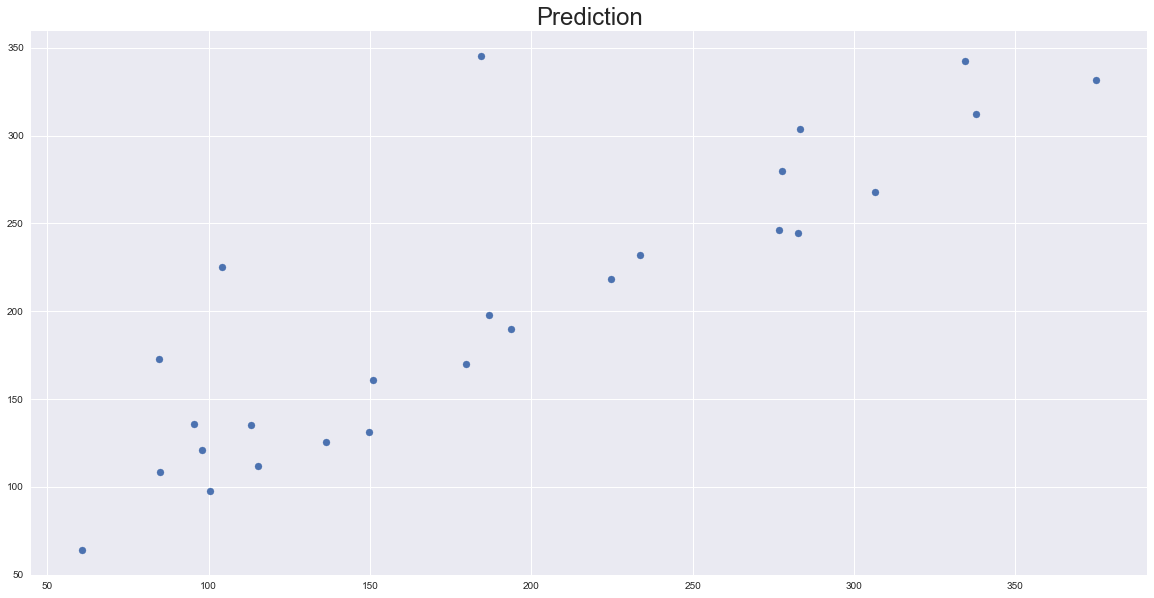

In [44]:
plt.scatter(y_test,y_pred)
plt.title('Prediction', Size=24)

In [4]:
#column names to create filtered data frame
col_names2 = ['Distance_per_season','Appearance', 'Minutes_Played', 'Age','Subbed_on','Subbed_off']

#creating new filtered dataset 
new_df2 =  data[col_names2]

#print the shape of the filtered data,
print('The current number of rows and columns is:\n')
print(new_df2.shape)
print('\nWe have reduce the number of variables to', new_df2.shape[1],'\n')

#Summary statistics and information of filtered data
print(new_df2.info())

The current number of rows and columns is:

(253, 6)

We have reduce the number of variables to 6 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
Distance_per_season    253 non-null float64
Appearance             253 non-null int64
Minutes_Played         253 non-null int64
Age                    253 non-null int64
Subbed_on              253 non-null int64
Subbed_off             253 non-null int64
dtypes: float64(1), int64(5)
memory usage: 11.9 KB
None


ValueError: Arrays were different lengths: 5 vs 0

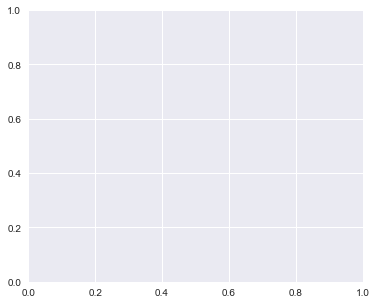

In [10]:
features2 = new_df2.loc[:,new_df2.columns != 'Distance_per_season']
targets2 = new_df2.loc[:,new_df2.columns == 'Distance_per_season']

#creating correlation of columns using Pearson's
corr2 = features2.corr(method='pearson') 

#plotting the correlation coefficients heatmap matrix
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr2, annot=True, xticklabels=corr2.columns, 
            yticklabels=corr2.columns, ax=ax, linewidths=.5, 
            vmin = -1, vmax=1, center=0)

plt.title('Correlation HeatMap')
plt.show()

In [11]:
#importing our function for splitting the data and an additional cross validation function,
from sklearn.model_selection import train_test_split, cross_val_score

#splitting our dataset randomly with the test data containing 10% of the data,
X_train, X_test, y_train, y_test = train_test_split(features2,targets2, 
                                                    test_size=0.1, 
                                                    random_state=42)

#view number of training and testing data
print('Training prediction variable includes :',len(y_train) ,'rows')
print('Training the independent variable includes :',len(X_train) ,'rows')
print('Testing prediction variable includes :',len(y_test) ,'rows')
print('Testing independent variable includes :',len(X_test) ,'rows')

Training prediction variable includes : 227 rows
Training the independent variable includes : 227 rows
Testing prediction variable includes : 26 rows
Testing independent variable includes : 26 rows


In [12]:
import sklearn.metrics
from sklearn.linear_model import LinearRegression

#Regression model added using Linear Regression class 
reg_model13 = LinearRegression()

In [13]:
#Fit the trianing data to the model,
reg_model13.fit(X_train, y_train)

#Value of Incercept and the coefficients
print('Intercept :', reg_model13.intercept_[0], '\n')
print(pd.DataFrame({'focus Variables':X_train.columns,'coeficients':reg_model13.coef_[0]}))

Intercept : 86.9874255421 

   coeficients focus Variables
0    -0.936017      Appearance
1     0.105760  Minutes_Played
2    -2.707040             Age
3     0.811287       Subbed_on
4     3.037079      Subbed_off


In [14]:
#Score of the training and testing
print("Training score: {:.2f}".format(reg_model13.score(X_train, y_train)))

Training score: 0.75


In [15]:
from sklearn.model_selection import cross_val_score
import math

cv_reg_model13 = LinearRegression()
cv_score2 = cross_val_score(cv_reg_model13, features2, targets2,cv=10, scoring='r2')

#outputs of crossing validation and average scores
print('Cross Validation score: {}'.format(cv_score2))
print("\nAverage 10-Fold Score: {}".format(np.mean(cv_score2)))

Cross Validation score: [ 0.64987097  0.75823383  0.30704045  0.83932281  0.64866024  0.78894233
  0.83822462  0.69183908  0.93426389  0.819153  ]

Average 10-Fold Score: 0.7275551225624345


Prediction of Samples are:
 [ 246.64242053  345.44306794  172.995289    112.40774134  131.39331457]


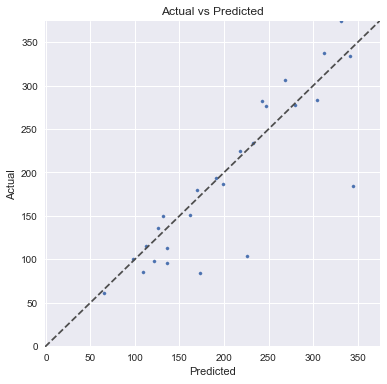

In [19]:
#prediction values using test set
y_pred = reg_model13.predict(X_test)

#print sample of predictions
print('Prediction of Samples are:\n', y_pred[:5].flatten())

y_ypred_a = pd.DataFrame(y_pred)
y_test_a = y_test.reset_index(drop=True, inplace=False)
pred_data = pd.concat([y_test_a,y_ypred_a], axis=1).sort_values(1,axis=1).reset_index(drop=True)

#output samples of predicted values
plt.figure(figsize=(6, 6))
maxlimit = pred_data['Distance_per_season'].max()
plt.xlim(-1, maxlimit)
plt.ylim(-1, maxlimit)
plt.scatter(pred_data[0], pred_data['Distance_per_season'], s=10)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.plot([-1,maxlimit], [-1,maxlimit], ls="--", c=".3")
plt.title('Actual vs Predicted') 
plt.show()

In [21]:
#column names to create filtered data frame
col_names3 = ['Distance_per_season','Appearance', 'Minutes_Played', 'Age','Subbed_on','Subbed_off']

#creating new filtered dataset 
new_df3 =  data[col_names3]

#print the shape of the filtered data,
print('The current number of rows and columns is:\n')
print(new_df3.shape)
print('\nWe have reduce the number of variables to', new_df3.shape[1],'\n')

#Summary statistics and information of filtered data
print(new_df3.info())

The current number of rows and columns is:

(253, 6)

We have reduce the number of variables to 6 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 6 columns):
Distance_per_season    253 non-null float64
Appearance             253 non-null int64
Minutes_Played         253 non-null int64
Age                    253 non-null int64
Subbed_on              253 non-null int64
Subbed_off             253 non-null int64
dtypes: float64(1), int64(5)
memory usage: 11.9 KB
None


ValueError: Arrays were different lengths: 5 vs 0

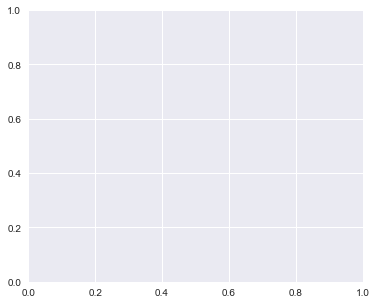

In [22]:
features3 = new_df3.loc[:,new_df3.columns != 'Distance_per_season']
targets3 = new_df3.loc[:,new_df3.columns == 'Distance_per_season']

#creating correlation of columns using Pearson's
corr3 = features3.corr(method='pearson') 

#plotting the correlation coefficients heatmap matrix
fig, ax = plt.subplots(figsize=(6,5))
sns.heatmap(corr3, annot=True, xticklabels=corr3.columns, 
            yticklabels=corr3.columns, ax=ax, linewidths=.5, 
            vmin = -1, vmax=1, center=0)

plt.title('Correlation HeatMap')
#plt.show()

In [23]:
#importing our function for splitting the data and an additional cross validation function,
from sklearn.model_selection import train_test_split, cross_val_score

#splitting our dataset randomly with the test data containing 20% of the data,
A_train, A_test, b_train, b_test = train_test_split(features3,targets3, 
                                                    test_size=0.2, 
                                                    random_state=42)

#view number of training and testing data
print('Training prediction variable includes :',len(b_train) ,'rows')
print('Training the independent variable includes :',len(A_train) ,'rows')
print('Testing prediction variable includes :',len(b_test) ,'rows')
print('Testing independent variable includes :',len(A_test) ,'rows')

Training prediction variable includes : 202 rows
Training the independent variable includes : 202 rows
Testing prediction variable includes : 51 rows
Testing independent variable includes : 51 rows


In [24]:
import sklearn.metrics
from sklearn.linear_model import LinearRegression

#Regression model added using Linear Regression class 
reg_model14 = LinearRegression()

In [25]:
#Fit the trianing data to the model,
reg_model14.fit(A_train, b_train)

#Value of Incercept and the coefficients
print('Intercept :', reg_model14.intercept_[0], '\n')
print(pd.DataFrame({'focus Variables':A_train.columns,'coeficients':reg_model14.coef_[0]}))

Intercept : 76.1863185868 

   coeficients focus Variables
0     0.171873      Appearance
1     0.095864  Minutes_Played
2    -2.493532             Age
3     0.088562       Subbed_on
4     2.864500      Subbed_off


In [26]:
#Score of the training and testing
print("Training score: {:.2f}".format(reg_model14.score(A_train, b_train)))

Training score: 0.77


In [27]:
from sklearn.model_selection import cross_val_score
import math

cv_reg_model14 = LinearRegression()
cv_score3 = cross_val_score(cv_reg_model14, features3, targets3,cv=10, scoring='r2')

#outputs of crossing validation and average scores
print('Cross Validation score: {}'.format(cv_score2))
print("\nAverage 10-Fold Score: {}".format(np.mean(cv_score2)))

Cross Validation score: [ 0.64987097  0.75823383  0.30704045  0.83932281  0.64866024  0.78894233
  0.83822462  0.69183908  0.93426389  0.819153  ]

Average 10-Fold Score: 0.7275551225624345
